# IMPALA Results

In [35]:
import sys
sys.path.insert(0, "../")
from  Utils.plot import plot_IMPALA_session
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import pandas as pd

## Loading metadata

In [36]:
def find_xpid_from_mapname(map_name, load_dir='../logs/torchbeast'):
    all_files = os.listdir(load_dir)
    xpid_files = [f for f in all_files if 'torchbeast' in f]
    matching_xpids = []
    for xpid in xpid_files:
        with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
            data = json.load(json_file)
            flags = data['args']
        if flags['map_name'] == map_name:
            print("Matchig xpid: ", xpid)
            print("Map name: ", flags['map_name'])
            print("Batch size: ", flags['batch_size'])
            print("Total steps: ", flags['total_steps'],'\n')
            matching_xpids.append(xpid)
    return matching_xpids

In [37]:
# search for xpids starting from the map name
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[1]
matching_xpids = find_xpid_from_mapname(map_name)
matching_xpids

Matchig xpid:  torchbeast-20200724-103742
Map name:  MoveToBeacon
Batch size:  22
Total steps:  6000 

Matchig xpid:  torchbeast-20200724-160238
Map name:  MoveToBeacon
Batch size:  22
Total steps:  30000 

Matchig xpid:  torchbeast-20200724-164219
Map name:  MoveToBeacon
Batch size:  24
Total steps:  6000 

Matchig xpid:  torchbeast-20200724-165751
Map name:  MoveToBeacon
Batch size:  24
Total steps:  60000 

Matchig xpid:  torchbeast-20200724-203021
Map name:  MoveToBeacon
Batch size:  24
Total steps:  60000 

Matchig xpid:  torchbeast-20200725-122210
Map name:  MoveToBeacon
Batch size:  24
Total steps:  60000 

Matchig xpid:  torchbeast-20200725-152321
Map name:  MoveToBeacon
Batch size:  12
Total steps:  60000 



['torchbeast-20200724-103742',
 'torchbeast-20200724-160238',
 'torchbeast-20200724-164219',
 'torchbeast-20200724-165751',
 'torchbeast-20200724-203021',
 'torchbeast-20200725-122210',
 'torchbeast-20200725-152321']

In [38]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200725"
hms = "152321"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [39]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])

Map name:  MoveToBeacon
Batch size:  12
Total steps:  60000


## Loading logs

In [40]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)

In [41]:
logs = logs[logs['mean_episode_return'].notna()]

In [42]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.595680e+09,0,494.420288,0.000000,486.204468,8.404165,-0.188351
3,3,1.595680e+09,180,-2164.417725,0.666667,-2190.176758,25.941036,-0.181854
7,7,1.595680e+09,420,-637.260193,1.909091,-659.423401,22.347198,-0.184022
8,8,1.595680e+09,480,448.674896,2.000000,437.233429,11.622450,-0.180963
10,10,1.595680e+09,600,496.584473,0.000000,480.041138,16.729712,-0.186360
...,...,...,...,...,...,...,...,...
995,995,1.595681e+09,59700,-1907.959839,24.800001,-9592.986328,7685.047363,-0.020833
996,996,1.595681e+09,59760,104.073837,24.000000,-598.274292,702.362061,-0.013931
998,998,1.595681e+09,59880,411.834076,29.000000,-241.007446,652.854553,-0.013037
999,999,1.595681e+09,59940,-1698.355103,24.700001,-9238.039062,7539.699219,-0.015311


In [43]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

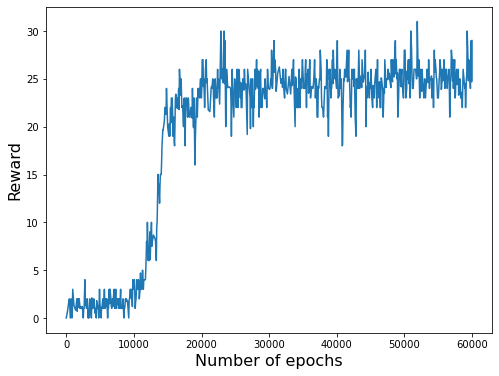

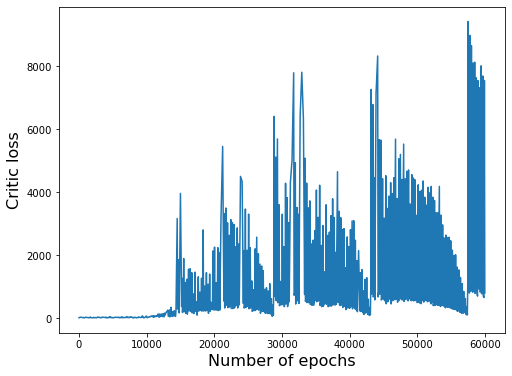

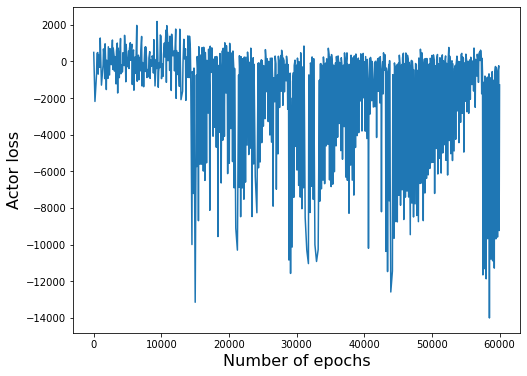

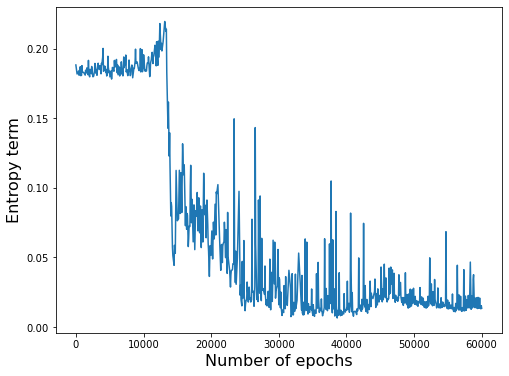

In [44]:
plot_IMPALA_session(results)

## Comments

Both Adam and RMSprop show oscillations in the actor and critic losses even after convergence to the optimal policy by the agent.

Removing gradient clipping we also get it somehow.